# Comparing classifiers

In this part you will compare the classification algorithms seen in this and the previous labs of MALIS course:

1. K nearest neighbors
2. Logistic regression
3. Neural Networks
4. Support Vector Machine (linear)
5. SVM with RBF kernel
6. Classification Tree

You have only to run the cells and answer the questions you can find after the code

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter("ignore")
from sklearn.exceptions import ConvergenceWarning

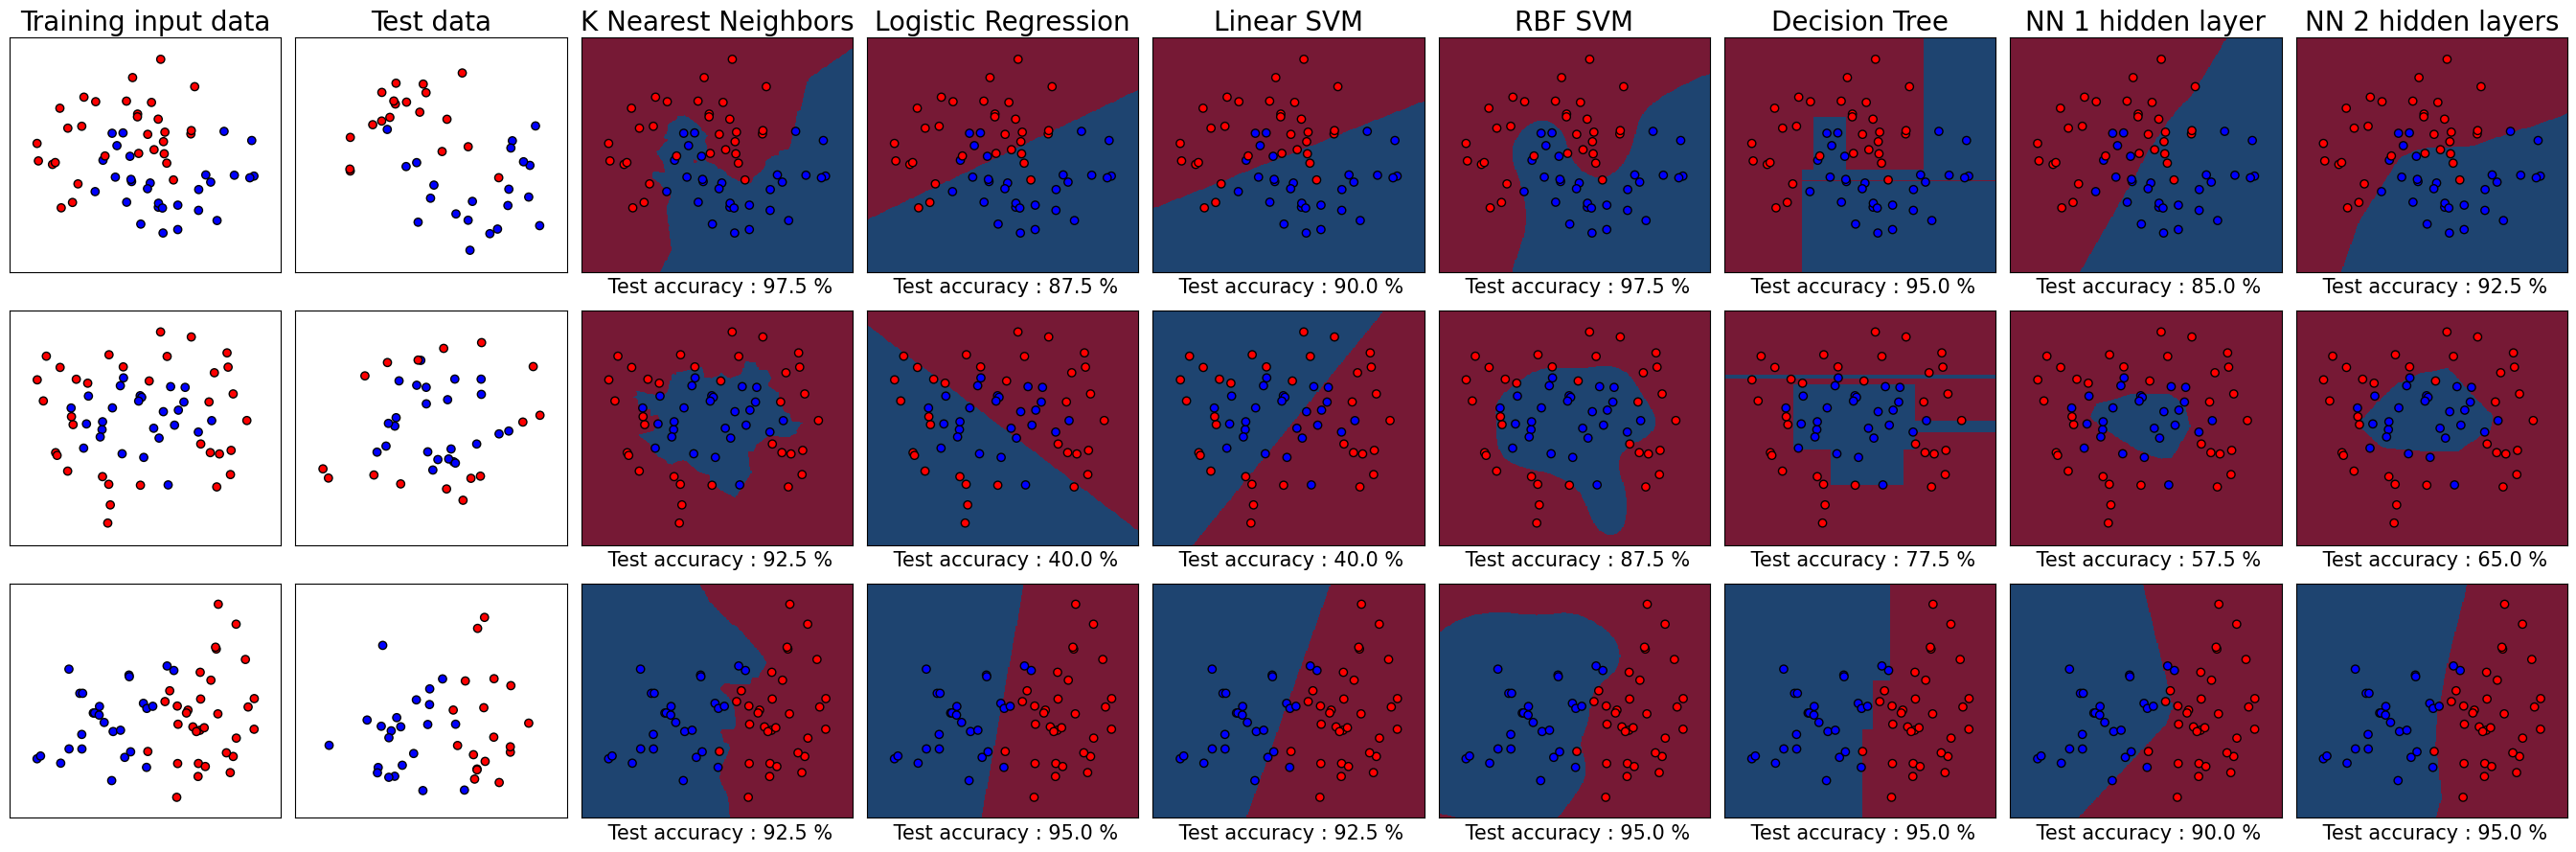

In [7]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=2000),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    #MLPClassifier(learning_rate_init=0.05, max_iter=3000, hidden_layer_sizes=(10), batch_size=60, learning_rate='constant',  activation='logistic', solver='sgd', tol=-10.),
    #MLPClassifier(learning_rate_init=0.05, max_iter=4000, hidden_layer_sizes=(10, 10), batch_size=60, learning_rate='constant', activation='logistic', solver='sgd', tol=-10.)]
    MLPClassifier(hidden_layer_sizes=(10)),
    MLPClassifier(hidden_layer_sizes=(10,10))]
    
# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

## Question 1

Comment the results obtained. Use the following questions to help you.
1. Which classifiers performs poorly? In which datasets? Why?
2. Do you think some classifiers are overfitting?
    1. If yes: which ones? in which datasets? which elements allow you to say that?
    2. If no : what you should see to say that a classifier is overfitting?
3. How does changing the parameters may affect the results?
   (changing K in nearest neighbors, the hardness of the SVM, the gamma of the RBF kernel, the depth of the tree, the number of neurons of the Neural Networks)

Your answers here: 

In each execution the perfomances vary. We are going to answer the following questions taking into account the information shown above.

**1. The classifiers that perform poorly are: Logistic Regression, Linear SVM, NN1 hidden layer and NN 2 hidden layers.**

They all perform poorly in the second dataset. 
This is because Logistic Regression and Linear SVM separate data using lines and in the second database the data is distributed in two concentric circles, so a line cannot separate them properly.

**2. Yes, we think that the KNN classifier might be overfitted. It overfits in all datasets but it is specially visible in the first two.**

The element that allowed us to spot this phenomenon was the form of the separation between blue and red. In KNN, the separation is full of very small curves, which is a symptom for overfitting, as it is too similar to the distributions of points in the training dataset.

We also think that the Decision Tree is overfitted. It is specially visible in the first and second datasets, where very thin areas ressembling lines appear in the middle of larger areas in order to classify correctly a single point. This phenomenon is a characteristic of overfitting.

**3. How does changing the parameters may affect the results?
   (changing K in nearest neighbors, the hardness of the SVM, the gamma of the RBF kernel, the depth of the tree, the number of neurons of the Neural Networks)**

Changing K in nearest neighbors: for low values of K we have the risk of overfitting and the model is more sensitive to noise. However, for high values of K the model can underfit and be very general. In this case K is 3 and the model is overfitted, by increasing K this could be prevented.

The hardness of the SVM: If we increse the hardness of the SVM we could improve its performance in the thirs dataset, as less missclasification will be allowed. In the first and second dataset the increse of the hardness would not help to improve the accuracy as the distribution of the data makes it harder to be separated properly with a line. A decrease in hardness will worsen the performances in the first and third dataset because of the distribution of the data.
 
The gamma of the RBF kernel: Gamma specifies the softness/hardness of the soft SVM, so if we increase gamma the softness of the SVM is decreased and the number of admited missclassified points in the training also decreases, leading to a more precise classification. However a vey high value of gamma might lead to overfitting in the results. Decreasing gamma will generate less accuracy. 

The depth of the tree: Increasing the depth of the tree allows to model complex relationships but also leads to overfitting. Decreasing the depth allows to generalise better in unseen data but fails to model complex relationships. In our case an increse in the depth of the tree will lead to overfitting, as the data is precisely modeled already. In the second dataset a decrease in the depth of the tree might improve the accuracy as it will generalize better in unseen data.

The number of neurons of the Neural Networks: Increasing the number of neurons allows to model complex relationships but also leads to overfitting. Decreasing the number allows to generalise better in unseen data but fails to model complex relationships. In our results, in the one neuron NN, specially in the second dataset, it will be better to increase the number of neurons as the model is underfitted.